In [66]:
# TO-DO:
# create index for all locations for commissioning years
# add the location
# index to those points in dataset
# multiply with linearly increasing factor for linear increasing capacity (from 0 to 1, increasing by same step hourly)
# re-insert into dataset

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
time = pd.date_range(pd.to_datetime('2000-01-01 00:00:00'),pd.to_datetime('2003-12-31 23:00:00'),freq='h')

In [18]:
ds = xr.DataArray(np.ones(5 * len(time)).reshape(5,len(time)),
                dims=['locs','time'],
                coords={'locs':['l1','l2','l3','l4','l5'],
                        'time':time})

In [11]:
com_years = [2000,2001,2003,2002,2001]

In [34]:
timespans = [list(pd.date_range(pd.to_datetime(str(com_years[i])+'-01-01 00:00:00'),pd.to_datetime(str(com_years[i])+'-12-31 23:00:00'),freq='h')) for i in range(len(com_years))]

In [35]:
locs = [[ds.locs.values[i]]*len(timespans[i]) for i in range(len(timespans))]

[Timestamp('2000-01-01 00:00:00'),
 Timestamp('2001-01-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2002-01-01 00:00:00'),
 Timestamp('2001-01-01 00:00:00')]

In [50]:
wind_com_years = ds.loc[xr.DataArray(sum(locs,[]),dims='cy'),
                    xr.DataArray(sum(timespans,[]),dims='cy')]

In [85]:
fact = sum([list(np.arange(1,len(x)+1)/len(x)) for x in locs],[])

In [87]:
ds.loc[xr.DataArray(sum(locs,[]),dims='cy'),
                    xr.DataArray(sum(timespans,[]),dims='cy')] = wind_com_years * fact

In [107]:
wind_com_years

<xarray.DataArray (cy: 43824)>
array([1., 1., 1., ..., 1., 1., 1.])
Coordinates:
    locs     (cy) <U2 'l1' 'l1' 'l1' 'l1' 'l1' 'l1' ... 'l5' 'l5' 'l5' 'l5' 'l5'
    time     (cy) datetime64[ns] 2000-01-01 ... 2001-12-31T23:00:00
Dimensions without coordinates: cy

In [110]:
ds

<xarray.DataArray (locs: 5, time: 35064)>
array([[1.138434e-04, 2.276867e-04, 3.415301e-04, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 9.997717e-01,
        9.998858e-01, 1.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00]])
Coordinates:
  * locs     (locs) <U2 'l1' 'l2' 'l3' 'l4' 'l5'
  * time     (time) datetime64[ns] 2000-01-01 ... 2003-12-31T23:00:00

In [115]:
dsc = ds.where(ds.time >= xr.DataArray([pd.to_datetime(str(y)+'-01-01 00:00:00') for y in com_years], dims='locs',coords={'locs':ds.locs.values}),0)

In [93]:
ds.values

array([[1.13843352e-04, 2.27686703e-04, 3.41530055e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.99771689e-01, 9.99885845e-01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

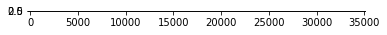

In [121]:
plt.imshow(dsc.values)

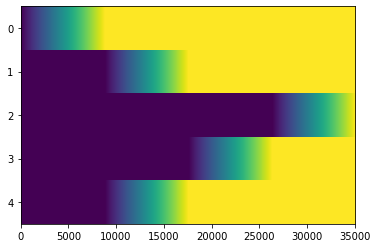

In [138]:
plt.imshow(dsc.values,aspect='auto')

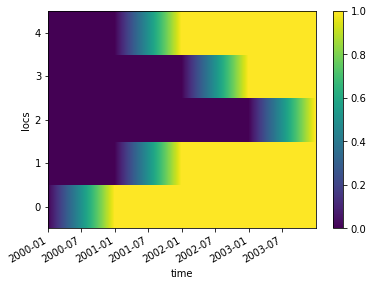

In [141]:
dsc.assign_coords(locs=[0,1,2,3,4]).plot()

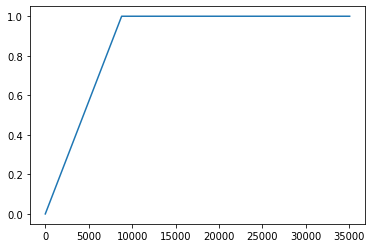

In [122]:
plt.plot(dsc.sel(locs='l1'))

 ...]

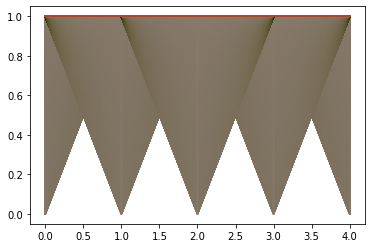

In [95]:
plt.plot(ds)

In [97]:
df = ds.to_dataframe(name='wind')

In [116]:
dfc = dsc.to_dataframe(name='wind')

locs
l1    AxesSubplot(0.125,0.125;0.775x0.755)
l2    AxesSubplot(0.125,0.125;0.775x0.755)
l3    AxesSubplot(0.125,0.125;0.775x0.755)
l4    AxesSubplot(0.125,0.125;0.775x0.755)
l5    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

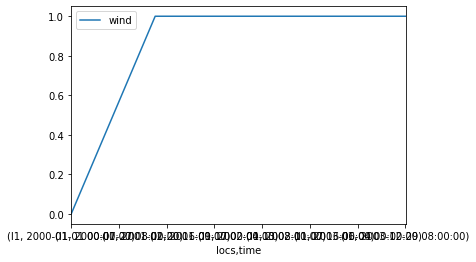

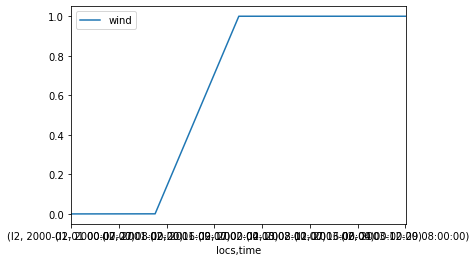

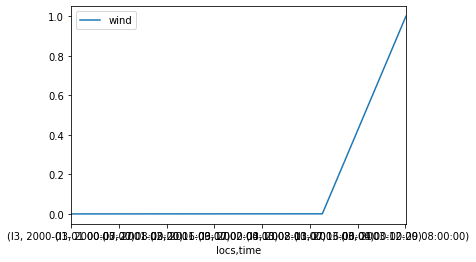

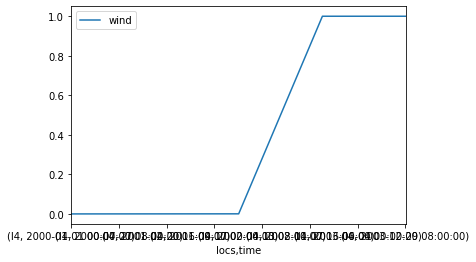

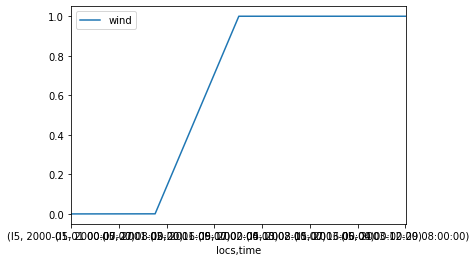

In [117]:
dfc.groupby('locs').plot()